<a href="https://colab.research.google.com/github/lld-git/bertoleza/blob/main/audio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa

In [4]:
# Clone path web
!git clone https://github.com/dolly8/Music-genre-classification.git

Cloning into 'Music-genre-classification'...
remote: Enumerating objects: 2051, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 2051 (delta 22), reused 0 (delta 0), pack-reused 2015
Receiving objects: 100% (2051/2051), 1.22 GiB | 30.15 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (2019/2019), done.


In [1]:
# Link colab
from google.colab import drive
drive.mount("/content/drive")
from zipfile import ZipFile

Mounted at /content/drive


In [2]:
# Clone drive
#!wget -O AudioClassification.zip /content/drive/My Drive/01_Projetos/Bertoleza/AudioClassification.zip
!cp "/content/drive/My Drive/01_Projetos/Bertoleza/Code/AudioClassification.zip" "AudioClassification.zip"

# Extract all the contents of zip file in current directory
with ZipFile('AudioClassification.zip', 'r') as zipObj:
   zipObj.extractall()

In [4]:
# Clone drive
#!wget -O AudioClassification.zip /content/drive/My Drive/01_Projetos/Bertoleza/AudioClassification.zip
!cp "/content/drive/My Drive/01_Projetos/Bertoleza/Code/JLCorpusData.zip" "JLCorpusData.zip"

# Extract all the contents of zip file in current directory
with ZipFile('JLCorpusData.zip', 'r') as zipObj:
   zipObj.extractall()

In [ ]:
# Clone model trained
!cp "/content/drive/My Drive/01_Projetos/Bertoleza/Code/model.zip" "model.zip"

# Extract all the contents of zip file in current directory
with ZipFile('model.zip', 'r') as zipObj:
   zipObj.extractall()

In [5]:
ls

AudioClassification.zip  JLCorpus/         Music-genre-classification/
drive/                   JLCorpusData.zip  sample_data/


In [6]:
pwd

'/content'


# kdnuggets (NÃO RODAR)

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
from keras.models import Sequential
import warnings
#warnings.filterwarnings('ignore')

In [ ]:
print(os.listdir())

['.config', 'Music-genre-classification', 'drive', 'bla.zip', 'Bla', '.ipynb_checkpoints', 'sample_data']


In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./Music-genre-classification/dataset/genres/{g}'):
        songname = f'./Music-genre-classification/dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('./Music-genre-classification/dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./Music-genre-classification/dataset/genres/{g}'):
        songname = f'./Music-genre-classification/dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('/Music-genre-classification/dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

"\nwith file:\n    writer = csv.writer(file)\n    writer.writerow(header)\ngenres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()\nfor g in genres:\n    for filename in os.listdir(f'./Music-genre-classification/dataset/genres/{g}'):\n        songname = f'./Music-genre-classification/dataset/genres/{g}/{filename}'\n        y, sr = librosa.load(songname, mono=True, duration=30)\n        rmse = librosa.feature.rms(y=y)\n        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)\n        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)\n        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)\n        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)\n        zcr = librosa.feature.zero_crossing_rate(y)\n        mfcc = librosa.feature.mfcc(y=y, sr=sr)\n        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    \n        for e in mfcc:\n            t

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
4/4 [==============================] - 2s 10ms/step - loss: 2.2672 - accuracy: 0.1752
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 1.9120 - accuracy: 0.5093
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.6227 - accuracy: 0.5467
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 1.3489 - accuracy: 0.5631
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1333 - accuracy: 0.6355
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9804 - accuracy: 0.6869
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8656 - accuracy: 0.7126
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7869 - accuracy: 0.7173
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7156 - accuracy: 0.7313
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.7780
Epoch 11/100
4/4 [=========

In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 7ms/step


In [ ]:
Y_pred

array([[6.44413285e-06, 3.05356878e-07, 3.22992094e-02, ...,
        7.48373736e-07, 1.03389297e-08, 1.06510669e-07],
       [2.16565371e-01, 1.01032005e-04, 7.82117426e-01, ...,
        7.13825045e-07, 7.19336910e-08, 3.39153559e-08],
       [9.81019810e-02, 3.00785899e-07, 8.97711277e-01, ...,
        6.66017741e-06, 5.22829396e-07, 1.15192017e-06],
       ...,
       [7.11828648e-07, 2.91872561e-06, 2.75747478e-02, ...,
        5.10018299e-06, 3.30228602e-07, 1.51387340e-07],
       [5.22487062e-06, 8.86273861e-01, 6.50600791e-02, ...,
        4.16660470e-07, 3.24596442e-07, 3.26893890e-08],
       [3.25269880e-11, 9.99999642e-01, 1.97940708e-09, ...,
        2.13857686e-12, 1.01546280e-11, 2.49689836e-13]], dtype=float32)

In [ ]:
y_test

array([3, 2, 0, 1, 1, 2, 2, 5, 0, 4, 0, 1, 2, 5, 3, 1, 1, 3, 4, 2, 0, 0,
       0, 0, 2, 2, 3, 4, 5, 4, 4, 2, 3, 0, 3, 2, 4, 1, 0, 1, 3, 0, 4, 3,
       3, 3, 0, 4, 4, 3, 4, 2, 0, 5, 5, 1, 2, 3, 0, 1, 1, 3, 3, 2, 0, 3,
       1, 2, 0, 0, 1, 2, 3, 4, 1, 0, 5, 1, 1, 1, 5, 3, 4, 0, 4, 4, 1, 4,
       2, 3, 3, 2, 1, 2, 4, 2, 2, 0, 5, 4, 3, 4, 1, 4, 3, 4, 5, 1])

In [ ]:
from sklearn.metrics import accuracy_score, \
                            mean_absolute_error, \
                            mean_squared_error,  \
                            confusion_matrix,  \
                            median_absolute_error, \
                            classification_report,  \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            ConfusionMatrixDisplay

matrix = classification_report(y_test,Y_pred)
print('Classification report : \n',matrix)

#matrix = confusion_matrix(y_test,Y_pred, labels=[1,0])
matrix = ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
print('Confusion matrix : \n',matrix)


tp, fn, fp, tn = confusion_matrix(y_test,Y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


matrix = classification_report(y_test,Y_pred,labels=[1,0])
print('Classification report : \n',matrix)

ValueError: ignored

# dolly8

In [61]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale, scale
import numpy as np


## Loading the audio dataset

In [31]:
audio_path = 'Music-genre-classification/dataset/genres/blues/blues.00001.wav'
x , sampling_rate = librosa.load(audio_path)


## Visualizing the dataset

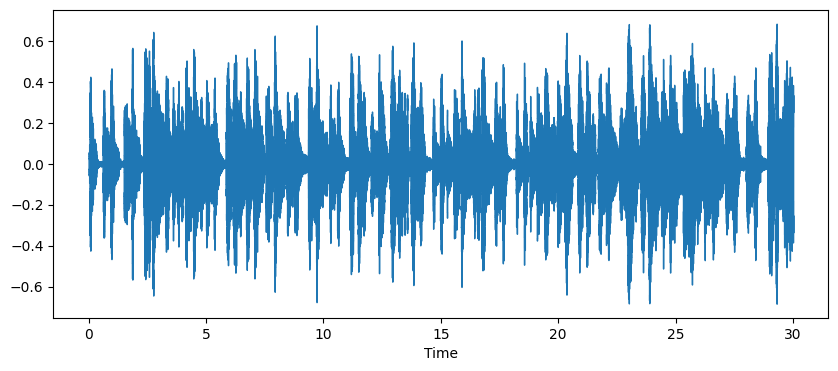

In [32]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=sampling_rate)

In [33]:
ipd.Audio(audio_path)


## Spectrogram conversion


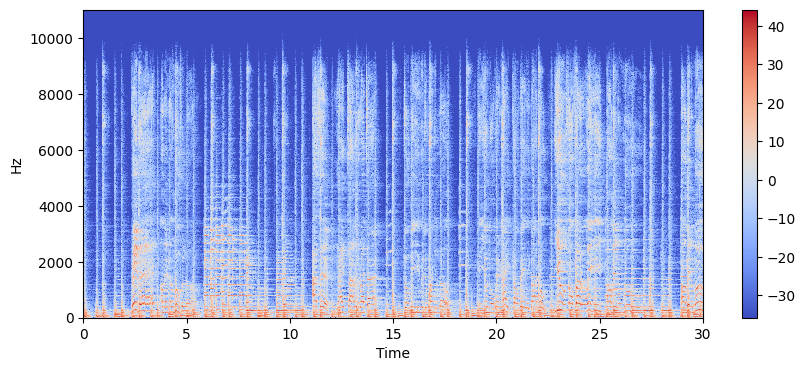

In [34]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()


## Zero crossing rate 

2


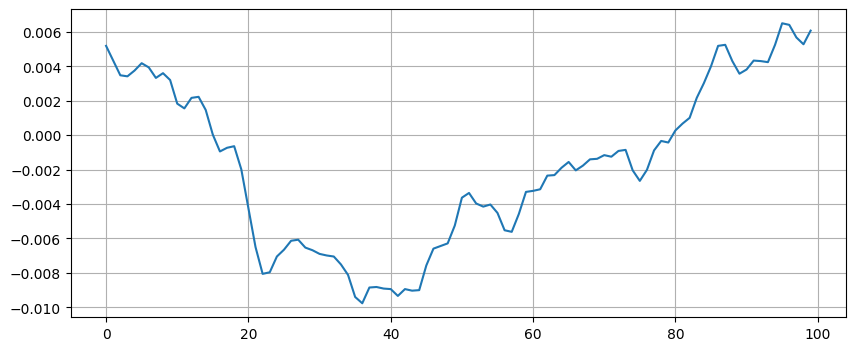

In [35]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(10, 4))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))


## Spectral centroid


In [ ]:
sampling_rate

22050

In [ ]:
x

array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
       -0.17495728, -0.15118408], dtype=float32)

## Spectral rolloff

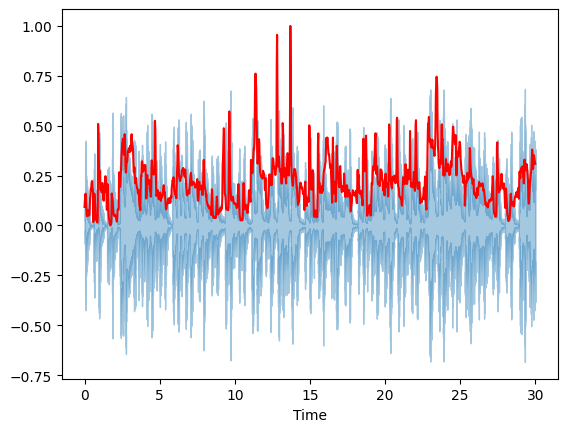

In [36]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sampling_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y=x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

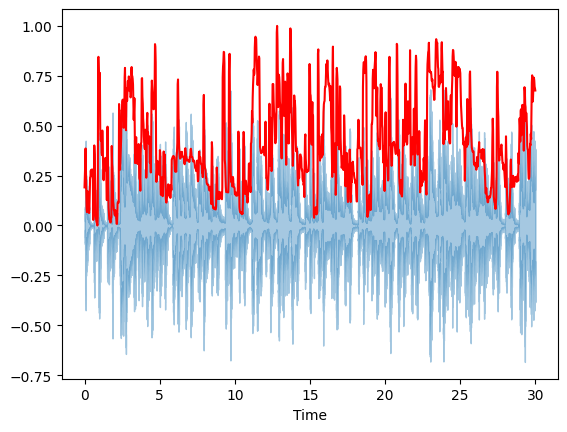

In [38]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sampling_rate)[0]
librosa.display.waveshow(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel frequency cepstrum coefficients(MFCCs) feature


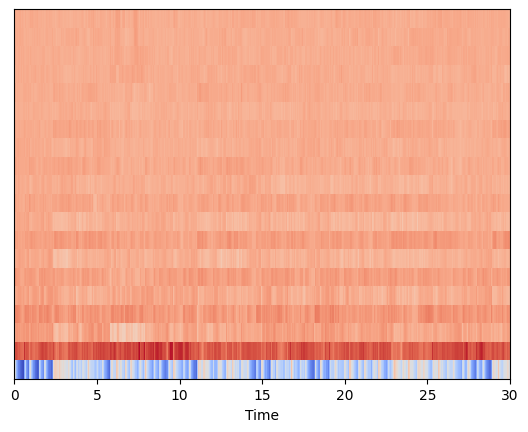

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sampling_rate)

#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 1.1801074e-08  5.9005369e-09  0.0000000e+00 -5.9005369e-09
  0.0000000e+00 -1.1801074e-08 -2.9502685e-09 -5.9005369e-09
  1.1801074e-08  5.9005369e-09  2.3602148e-08  0.0000000e+00
  8.8508054e-09 -2.9502685e-09  1.1801074e-08  1.4751342e-09
  0.0000000e+00  0.0000000e+00 -5.9005369e-09  5.9005369e-09]
[1.        1.        1.        1.        1.        1.0000001 1.
 0.9999999 1.        1.        1.        0.9999998 0.9999998 1.
 1.        1.        1.        0.9999998 1.        1.       ]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


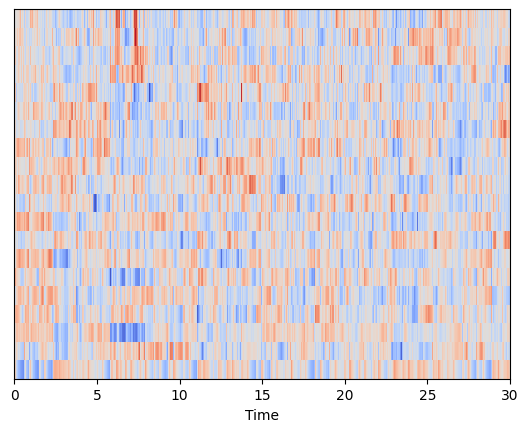

In [ ]:
mfccs = scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

## Chroma feature

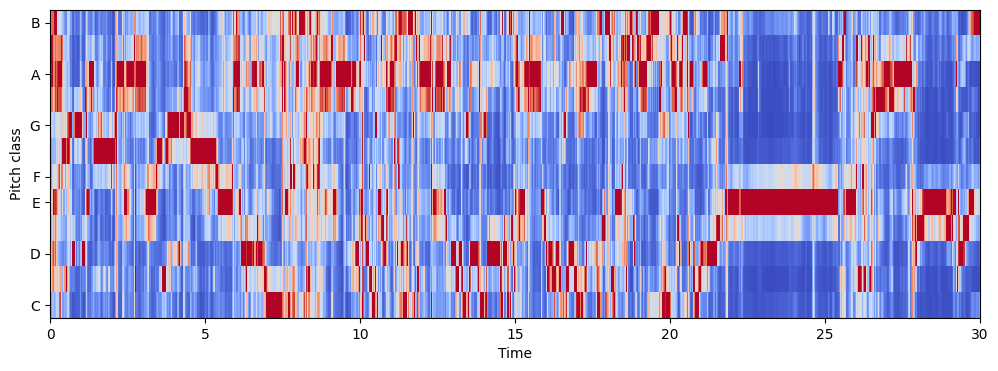

In [ ]:
# Loadign the file
x, sr = librosa.load('Music-genre-classification/dataset/genres/rock/rock.00001.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## Extracting features from Spectrogram


  * Necessario corrigir paths (foram deixados errados propositalmente pois na base de teste os dados já existem)

In [ ]:
import pathlib,os
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data2/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./Music-genre-classification/dataset/genres/{g}'):
        songname = f'./Music-genre-classification/dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data2/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf() 

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


## Writing data to csv file


In [ ]:
import csv
import numpy as np
file = open('Music-genre-classification/data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./Music-genre-classification/dataset/genres/{g}'):
        songname = f'./Music-genre-classification/dataset/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('Music-genre-classification/data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
!zip -r "/content/drive/My Drive/01_Projetos/Bertoleza/Code/AudioClassification.zip" "Music-genre-classification"


## Analyse the data using pandas


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('./Music-genre-classification/data.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00017.wav     0.302239  0.093259        1088.778116   
1  blues.00093.wav     0.377736  0.065891         570.150688   
2  blues.00001.wav     0.340945  0.095892        1529.871314   
3  blues.00044.wav     0.390160  0.136178        2279.265543   
4  blues.00045.wav     0.429721  0.148304        1739.046161   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         1410.835953  2134.753758            0.048324 -245.754135   
1          995.093473   928.852717            0.021701 -350.358887   
2         2038.612143  3548.986873            0.056044 -207.581512   
3         2375.084795  5198.476899            0.092570 -109.532341   
4         2290.400608  4551.180813            0.048052 -163.243134   

        mfcc2      mfcc3  ...     mfcc12    mfcc13    mfcc14     mfcc15  \
0  140.480927  -2.771439  ...  -4.015731  1.607454  5.898682  -3.017608   
1  169.546326  31.780231  ...   1.810350 -5.970981 -5.258748  -0.228882   
2  123.997147   8.939115  ...   5.375942 -2.237833  4.217125  -6.011048   
3   86.926498  -8.624990  ...  11.086617 -5.094468  3.978772 -12.864777   
4   89.784882  12.977459  ...   6.007190 -2.908132 -0.434835 -17.545372   

      mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  label  
0  -4.774899 -3.027070 -1.998533 -0.058759 -3.971890  blues  
1  -1.775328 -3.708839  0.175169  2.076679 -2.892004  blues  
2   0.932668 -0.717028  0.292333 -0.285717  0.532144  blues  
3  12.342427  0.020585 -0.739238 -5.130451  3.307131  blues  
4   4.154168 -5.990098 -7.862036 -8.565295  1.857171  blues  

[5 rows x 28 columns]

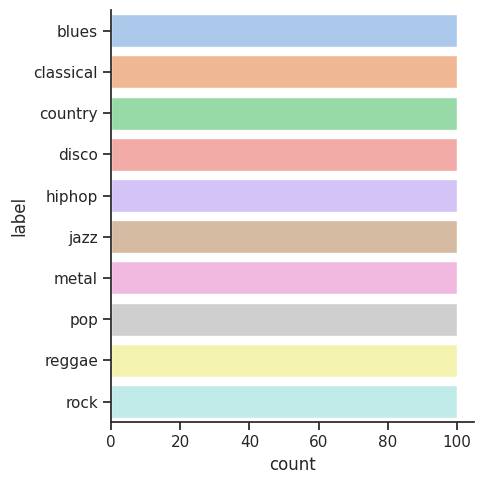

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.catplot(y= 'label', kind= 'count', data= data, palette = 'pastel')

In [ ]:
data.shape

(1000, 28)

In [ ]:
data = data.drop(['filename'], axis=1) # drop name of the column which is unnecessary

## Encoding the labels


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
labels = data.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

## Scaling the feature columns


In [ ]:
scaler=StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))


## split the dataset


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape
train_x.shape[1]

26

In [ ]:
#reshaping into 2d array
train_x=np.reshape(train_x,(train_x.shape[0],13,2,1))
test_x=np.reshape(test_x,(test_x.shape[0],13,2,1))
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((800, 13, 2, 1), (200, 13, 2, 1), (800,), (200,))

In [ ]:
train_y

array([0, 3, 6, 6, 9, 9, 2, 5, 5, 4, 2, 1, 2, 0, 8, 2, 0, 4, 8, 7, 6, 4,
       3, 4, 1, 2, 9, 6, 0, 3, 6, 9, 2, 7, 0, 4, 1, 7, 4, 8, 2, 8, 2, 0,
       9, 3, 1, 8, 3, 4, 2, 5, 3, 2, 9, 7, 1, 1, 4, 7, 9, 6, 4, 7, 7, 3,
       1, 9, 2, 4, 8, 5, 4, 9, 2, 4, 8, 9, 9, 9, 7, 4, 4, 1, 2, 9, 2, 7,
       3, 2, 1, 7, 6, 4, 1, 8, 7, 8, 8, 4, 5, 9, 2, 3, 9, 8, 1, 3, 1, 9,
       9, 1, 1, 0, 6, 0, 3, 2, 3, 7, 1, 4, 1, 9, 4, 6, 1, 4, 4, 2, 8, 9,
       7, 7, 2, 5, 1, 8, 4, 3, 9, 7, 8, 6, 2, 2, 8, 5, 4, 8, 6, 1, 8, 2,
       8, 5, 0, 8, 6, 5, 6, 6, 0, 6, 0, 3, 8, 0, 8, 6, 6, 9, 0, 8, 1, 9,
       5, 2, 9, 5, 6, 1, 1, 7, 5, 9, 5, 4, 6, 4, 3, 4, 0, 3, 0, 9, 6, 0,
       0, 0, 6, 7, 7, 3, 9, 5, 9, 8, 7, 4, 0, 0, 0, 1, 5, 6, 7, 1, 6, 0,
       4, 8, 6, 3, 7, 7, 5, 6, 8, 7, 9, 9, 9, 1, 5, 0, 6, 2, 6, 3, 8, 6,
       7, 1, 6, 0, 7, 3, 4, 2, 9, 0, 6, 0, 5, 2, 6, 5, 6, 4, 1, 5, 9, 6,
       7, 1, 8, 0, 5, 4, 6, 5, 1, 6, 0, 5, 6, 3, 9, 4, 9, 6, 4, 1, 3, 7,
       6, 0, 6, 0, 7, 6, 1, 9, 6, 5, 4, 0, 3, 1, 2,

In [ ]:
from keras.utils.np_utils import to_categorical
train_y=to_categorical(train_y, num_classes=10)
test_y=to_categorical(test_y, num_classes=10)
train_y.shape, test_y.shape
train_y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## Building our neural network

In [ ]:
from keras import Sequential
# import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
model=Sequential()

In [ ]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu",input_shape=(13,2,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(512,activation="relu"))
# model.add(Dropout(0.35))

model.add(Dense(10,activation="softmax"))

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the model
model.fit(train_x,train_y,batch_size=64,epochs=100,validation_data=(test_x,test_y))

Epoch 1/100
13/13 [==============================] - 6s 302ms/step - loss: 2.2588 - accuracy: 0.1688 - val_loss: 2.0281 - val_accuracy: 0.3300
Epoch 2/100
13/13 [==============================] - 5s 415ms/step - loss: 1.9002 - accuracy: 0.2875 - val_loss: 1.7481 - val_accuracy: 0.3950
Epoch 3/100
13/13 [==============================] - 4s 278ms/step - loss: 1.7738 - accuracy: 0.3187 - val_loss: 1.6495 - val_accuracy: 0.3450
Epoch 4/100
13/13 [==============================] - 4s 281ms/step - loss: 1.6568 - accuracy: 0.3713 - val_loss: 1.5266 - val_accuracy: 0.4100
Epoch 5/100
13/13 [==============================] - 5s 364ms/step - loss: 1.5989 - accuracy: 0.3862 - val_loss: 1.4794 - val_accuracy: 0.4500
Epoch 6/100
13/13 [==============================] - 4s 312ms/step - loss: 1.5570 - accuracy: 0.4325 - val_loss: 1.4387 - val_accuracy: 0.4200
Epoch 7/100
13/13 [==============================] - 4s 280ms/step - loss: 1.4474 - accuracy: 0.4550 - val_loss: 1.3714 - val_accuracy: 0.4950

In [ ]:
y_pred = model.predict(test_x)

7/7 [==============================] - 0s 16ms/step


In [ ]:
y_pred

array([[1.8006371e-02, 4.1197993e-07, 4.0835100e-03, ..., 4.4915413e-07,
        1.1717529e-04, 9.7741866e-01],
       [3.5313846e-08, 1.3497691e-02, 7.5783042e-08, ..., 1.7517259e-09,
        3.0369221e-10, 2.7272084e-12],
       [1.6526054e-16, 9.9999994e-01, 4.8264409e-20, ..., 1.6516743e-14,
        2.1833749e-16, 4.3573098e-23],
       ...,
       [1.6747986e-08, 1.3393642e-09, 5.9150273e-07, ..., 1.5279693e-05,
        1.1778597e-05, 2.9784739e-02],
       [1.4016712e-04, 3.9547069e-07, 2.3419730e-01, ..., 1.2987989e-04,
        1.6569764e-05, 7.5462776e-01],
       [2.6420426e-02, 1.6656701e-07, 2.5832512e-06, ..., 5.2383173e-09,
        8.2599736e-06, 1.8563492e-03]], dtype=float32)

In [ ]:
test_y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

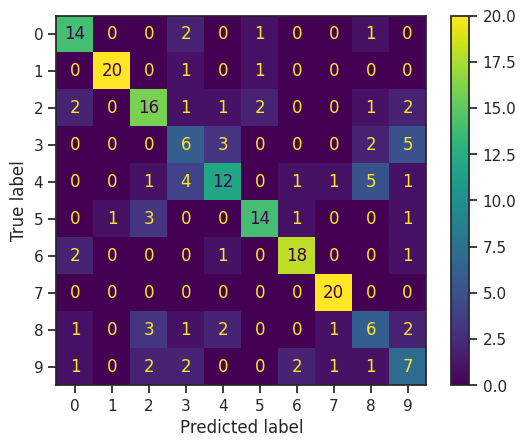

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(test_y, axis=1)

ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels)

In [ ]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.95      0.91      0.93        22
           2       0.64      0.64      0.64        25
           3       0.35      0.38      0.36        16
           4       0.63      0.48      0.55        25
           5       0.78      0.70      0.74        20
           6       0.82      0.82      0.82        22
           7       0.87      1.00      0.93        20
           8       0.38      0.38      0.38        16
           9       0.37      0.44      0.40        16

    accuracy                           0.67       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.67      0.67      0.66       200



Salvar modelo keras

  https://www.tensorflow.org/guide/keras/save_and_serialize?hl=pt-br

In [ ]:
# Salvar modelo treinado
model.save('./KerasModel/fited_model')

In [ ]:
!zip -r "/content/drive/My Drive/01_Projetos/Bertoleza/Code/model.zip" "./KerasModel/fited_model"

  adding: KerasModel/fited_model/ (stored 0%)
  adding: KerasModel/fited_model/keras_metadata.pb (deflated 92%)
  adding: KerasModel/fited_model/assets/ (stored 0%)
  adding: KerasModel/fited_model/fingerprint.pb (stored 0%)
  adding: KerasModel/fited_model/variables/ (stored 0%)
  adding: KerasModel/fited_model/variables/variables.index (deflated 65%)
  adding: KerasModel/fited_model/variables/variables.data-00000-of-00001 (deflated 47%)
  adding: KerasModel/fited_model/saved_model.pb (deflated 89%)


In [ ]:
# Utilizar modelo treinado
from tensorflow import keras
model1 = keras.models.load_model('./KerasModel/fited_model')

# Sentimental

## Spectrogram conversion

- Retornar a serie temporal de audio, a taxa de amostragem e representar visualmente a forma de onda

- Calcular o short-time Fourier transform (STFT) e armazenar a matriz complexa que representa o espectrograma, converter a amplitude do espectrograma (o valor absoluto da matriz complexa X) para decibéis e exibir o espectrograma em decibéis.

O espectrograma do áudio em decibéis auxilia na analise compreenção das características de frequência do áudio ao longo do tempo e torna os dados mais fáceis de visualizar e interpretar. A percepção da intensidade do som é mais próxima de uma escala logarítmica do que de uma escala linear.

Links úteis:
- https://en.wikipedia.org/wiki/Short-time_Fourier_transform


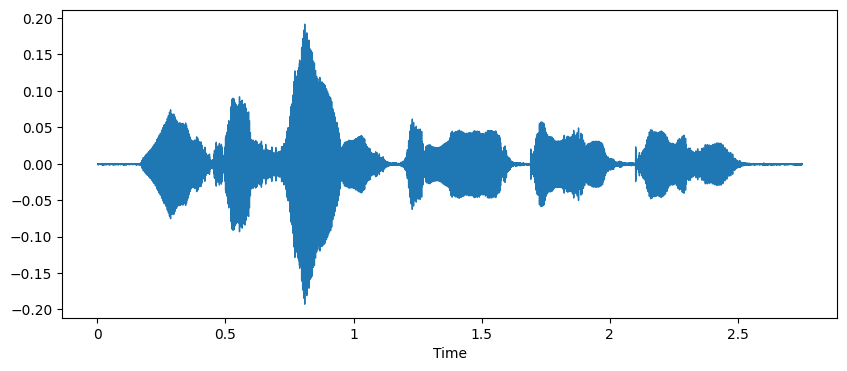

In [39]:
audio_path = 'JLCorpus/dataset/emotions/angry/female1_angry_10a_1.wav'
x , sampling_rate = librosa.load(audio_path)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x, sr=sampling_rate)

In [40]:
# Ouvir audio no colab
ipd.Audio(audio_path)

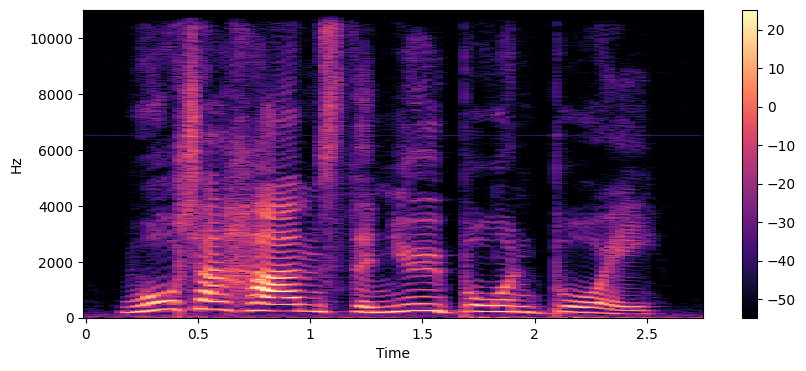

In [41]:
# Calculo do STFT da série temporal de áudio
X = librosa.stft(x)
# Converter a amplitude do espectrograma (o valor absoluto da matriz complexa X) para decibéis 
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()


## Zero crossing rate 

Ampliar uma parte específica da série temporal de áudio e contar o número de cruzamentos por zero na região selecionada. Esta técnica pode ser util para avaliar características importantes para a análise de áudio e processamento de sinais.

No exemplo:
- Taxa de amostragem for 22050 Hz
- Início do intervalo em segundos: 9000 / 22050 ≈ 0.408 segundos
- Fim do intervalo em segundos: 9100 / 22050 ≈ 0.412 segundos

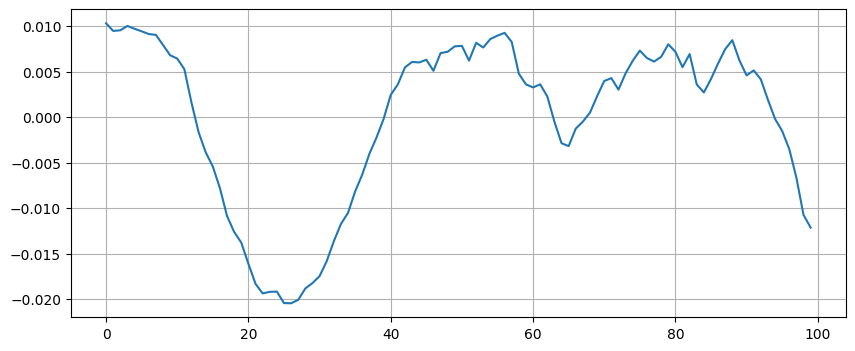

In [42]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(10, 4))
plt.plot(x[n0:n1])
plt.grid()

In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

5


## Spectral rolloff

Calcular os centróides espectrais da série temporal de áudio x e visualiza-los junto com a forma de onda do áudio. Os centróides espectrais são uma medida do "centro de massa" das frequências presentes em um sinal e podem ser usados para caracterizar o timbre ou a "cor" do som.

O rolloff espectral é uma medida que indica a frequência abaixo da qual uma porcentagem específica (por padrão, 85%) da energia espectral total está concentrada. Essa medida pode ser útil para caracterizar o conteúdo de alta frequência de um sinal de áudio e diferenciar entre diferentes tipos de sons ou instrumentos.

Links úteis:

https://www.sciencedirect.com/topics/engineering/spectral-centroid

In [43]:
# Calcular os centróides espectrais da série temporal de áudio
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sampling_rate)[0]
spectral_centroids.shape

(119,)

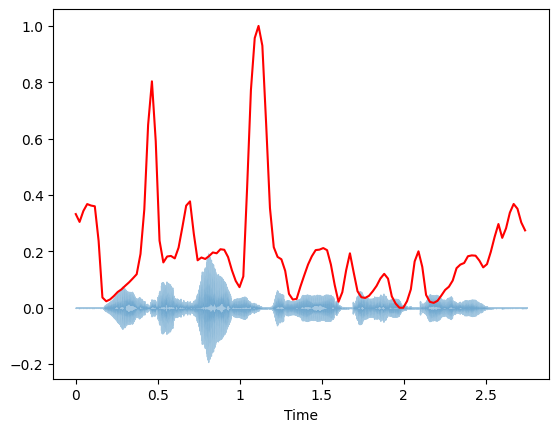

In [44]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y=x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

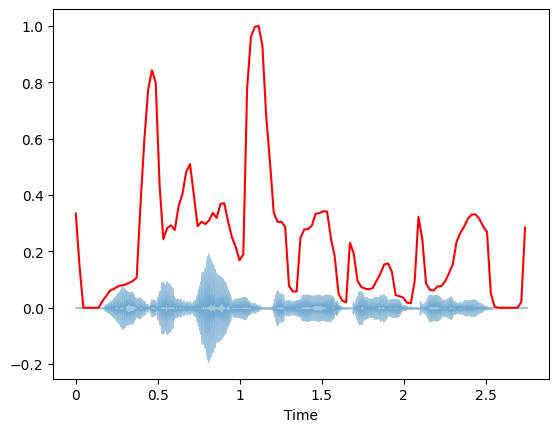

In [45]:
# Adicionar 0.01 ao sinal x para e evitar problemas numéricos caso o sinal contenha valores muito próximos de zero.
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sampling_rate)[0]
librosa.display.waveshow(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel frequency cepstrum coefficients(MFCCs) feature

Os Coeficientes cepstrais na frequência de Mel (Mel frequency cepstral coefficients - MFCCs) são uma das características de áudio mais populares e amplamente utilizadas no campo da análise de áudio, processamento de sinais e reconhecimento de voz. Eles são usados para capturar informações sobre o timbre e as características espectrais de um sinal de áudio, como a forma do espectro de frequência.

Os coeficientes resultantes são os MFCCs, que são uma representação compacta e eficiente das características espectrais do sinal de áudio. Os primeiros MFCCs capturam informações de baixa frequência, enquanto os MFCCs de ordem mais alta capturam informações de alta frequência. Normalmente, apenas um subconjunto dos coeficientes cepstrais (por exemplo, os primeiros 12 ou 13) é utilizado, pois os coeficientes de ordem mais alta tendem a ser menos relevantes e podem conter ruído.

Os MFCCs são especialmente úteis para tarefas como reconhecimento de voz, identificação de locutor, classificação de gênero musical e detecção de emoções em áudio, pois eles capturam informações importantes sobre o timbre e a textura do som.

Para calcular os MFCCs, segue-se geralmente um conjunto de etapas:

- Aplicar uma Transformada de Fourier de Tempo Curto (Short-Time Fourier Transform - STFT) no sinal de áudio para obter o espectrograma.
- Converter o espectrograma linear (em Hz) para a escala de Mel, aplicando um banco de filtros na frequência de Mel.
- Calcular o logaritmo da energia espectral de cada banda de frequência de Mel.
- Aplicar a Transformada Discreta do Coseno (Discrete Cosine Transform - DCT) aos logaritmos das energias espectrais.

'\nO eixo x representa o tempo, e cada linha do espectrograma representa um coeficiente MFCC diferente. \nAs cores no espectrograma indicam a magnitude dos coeficientes MFCC em diferentes momentos no tempo.\n'

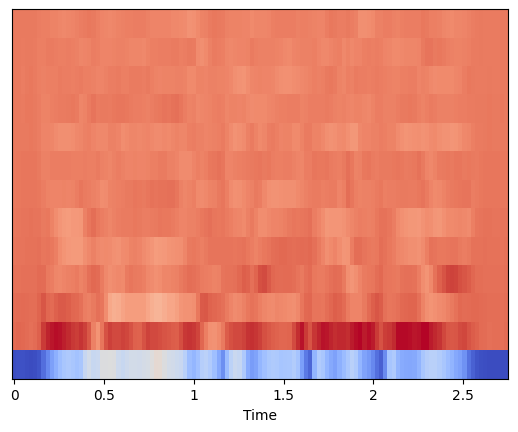

In [54]:
#Por padrão, essa função retorna 20 MFCCs, é possível ajustar o número de coeficientes passando o parâmetro n_mfcc.
mfccs = librosa.feature.mfcc(y=x, sr=sampling_rate, n_mfcc=13)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

'''
O eixo x representa o tempo, e cada linha do espectrograma representa um coeficiente MFCC diferente. 
As cores no espectrograma indicam a magnitude dos coeficientes MFCC em diferentes momentos no tempo.
'''

Normalizar os coeficientes MFCCs calcular a média e a variância de cada coeficiente ao longo do tempo e exibir novamente os MFCCs normalizados como um espectrograma.

A normalização dos MFCCs pode ser útil na classificação ou reconhecimento de padrões, pois ajuda a garantir que os coeficientes sejam comparáveis entre diferentes sinais de áudio e reduz a influência de variações absolutas na amplitude ou energia do sinal.

As cores no espectrograma indicam a magnitude dos coeficientes MFCC em diferentes momentos no tempo.


[ 1.2021105e-08  8.0140703e-09 -4.0070351e-09  9.7671480e-09
  1.0017588e-08  1.0017588e-09 -9.0158290e-09 -1.0017588e-09
 -7.0123112e-09 -6.0105525e-09  7.0123112e-09 -1.3022864e-08
 -1.0017588e-09]
[1.         1.0000002  0.99999994 1.0000001  1.0000001  1.0000001
 0.9999999  0.9999998  0.99999994 1.0000001  0.9999999  1.0000002
 0.99999994]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


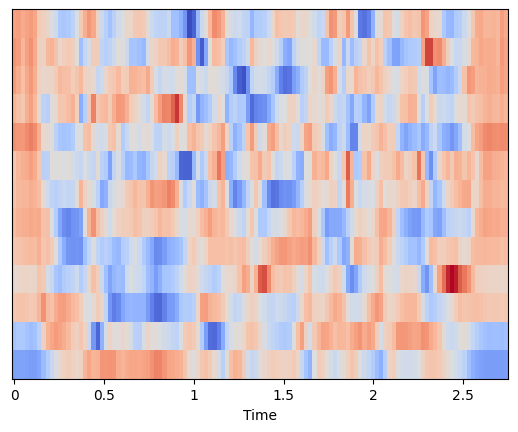

In [55]:
# Normalizar os MFCCs ao longo do eixo x ajustando os valores para terem média zero e variância unitária.
mfccs = scale(mfccs, axis=1)
# Calcular e imprimir a média de cada coeficiente MFCC ao longo do tempo. Como os valores estão normalizados os valores de MFCCs devem ser próximos de zero.
print(mfccs.mean(axis=1))
# Calcular e imprimir a variância de cada coeficiente MFCC ao longo do tempo. Como foram normalizados esses valores devem ser próximos de um.
print(mfccs.var(axis=1))
# Exibi os MFCCs normalizados como um espectrograma onde cada linha do espectrograma representa um coeficiente MFCC diferente. 
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

## Chroma feature

O recurso chroma é uma representação compacta das informações de pitch (altura) de um sinal de áudio. Ele é comumente utilizado na análise e classificação de música, pois captura informações importantes sobre a estrutura harmônica e a progressão de acordes em uma música.

O eixo x representa o tempo, e o eixo y representa as classes de pitch (altura) na escala cromática.

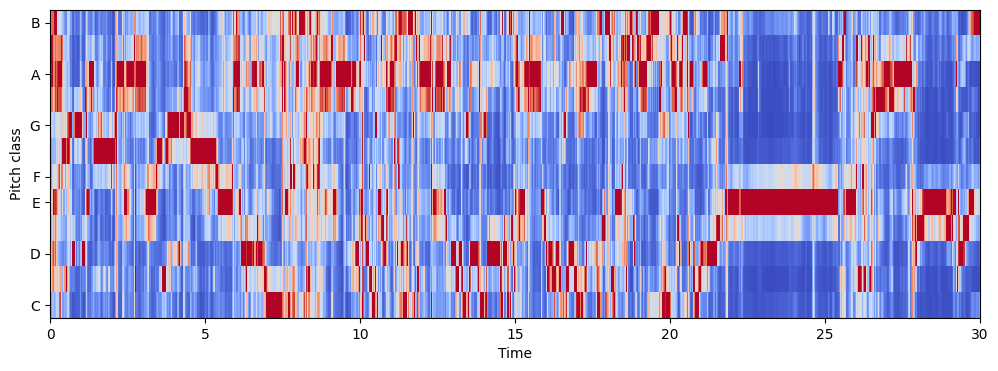

In [56]:
# Loadign the file
x, sr = librosa.load('Music-genre-classification/dataset/genres/rock/rock.00001.wav')
# Determina a quantidade de amostras entre quadros consecutivos na análise de STFT e chroma.
hop_length = 512
# usa a Transformada de Fourier (STFT) para calcular o espectrograma do sinal e extrai o recurso chroma para cada frame.
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(12, 4))
#O parâmetro hop_length é fornecido para garantir que o eixo do tempo seja exibido corretamente. 
#O mapa de cores coolwarm é usado para exibir as diferentes intensidades dos recursos chroma.
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

Para analisar emoções em áudios de fala, os seguintes recursos podem ser mais relevantes que o chroma feature:

- Mel Frequency Cepstral Coefficients (MFCCs): Os MFCCs são uma representação compacta das características espectrais do sinal de áudio e são comumente usados em aplicações de análise de voz e detecção de emoções.

- Pitch (frequência fundamental): A frequência fundamental é uma característica importante da voz humana e pode variar significativamente com diferentes emoções. Por exemplo, a frequência fundamental tende a ser maior em falas animadas ou com raiva e menor em falas calmas ou tristes.

- Formantes: Os formantes são frequências de ressonância do trato vocal e podem fornecer informações sobre a qualidade da voz e a articulação dos sons. Os formantes também podem ser úteis para distinguir diferentes emoções na fala.

- Energia e taxa de cruzamento por zero: A energia do sinal e a taxa de cruzamento por zero podem fornecer informações sobre a intensidade e a atividade do sinal de voz, respectivamente. Esses recursos podem ser úteis para identificar emoções, como falas mais enérgicas podem indicar emoções como raiva ou felicidade, enquanto falas com menor energia podem indicar tristeza ou calma.

- Ritmo e duração: A duração e o ritmo das unidades de fala (por exemplo, sílabas, palavras) também podem fornecer informações sobre emoções. Emoções diferentes podem ser expressas com diferentes taxas de fala e padrões de ritmo.

### Pitch (frequência fundamental) 

A lib librosa possui duas formas de implemnetar o calculo do Piych, sendo eles:

- YIN: O algoritmo YIN, proposto por Alain de Cheveigné e Hideki Kawahara em 2002, é um método baseado na diferença de tempo de atraso (TDA - Time Delay of Arrival). Ele calcula a função de diferença acumulada normalizada e busca o mínimo local dessa função para determinar o período do sinal e, portanto, a frequência fundamental. YIN é um método determinístico e fornece apenas uma única estimativa de F0 para cada quadro analisado.

- pYIN (Probabilistic YIN): O pYIN, proposto por Matthias Mauch e Simon Dixon em 2014, é uma extensão do algoritmo YIN que incorpora um modelo probabilístico de pitch. Isso significa que, em vez de fornecer apenas uma única estimativa de F0, o pYIN fornece uma distribuição de probabilidade de pitch para cada quadro analisado. Essa abordagem permite que o pYIN lide melhor com a incerteza na estimativa do pitch e reduza os erros devido à presença de harmônicos ou ruído no sinal de áudio.

A frequência mínima e máxima para o cálculo do pitch (frequência fundamental) podem ser definidas com base no intervalo de frequências esperado para a voz humana. Em geral, a frequência fundamental da voz humana varia aproximadamente de 85 Hz a 255 Hz para homens e de 165 Hz a 255 Hz para mulheres. 

Contudo esses intervalos podem variar dependendo da idade, sexo e características individuais da voz. Pode ser útil definir um intervalo mais amplo para cobrir mais variações possíveis. O intervalo entre 50 Hz a 400 Hz garante que a maior parte das frequências fundamentais da voz humana seja coberta.

In [59]:
# Usando a função yin
yin = librosa.yin(x, fmin=50, fmax=400, sr=sampling_rate)

# Usando a função pyin
pyin = librosa.pyin(x, fmin=50, fmax=400, sr=sampling_rate)

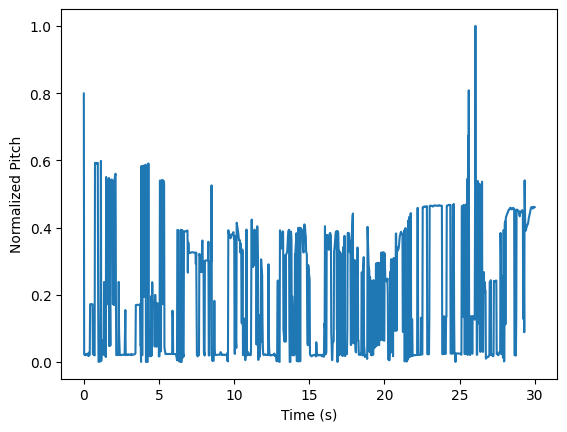

In [63]:
# Calcular pitch
pyin = librosa.yin(x, fmin=50, fmax=400, sr=sampling_rate)

# Normalizar
normalized_yin = normalize(yin)

# Exibir o pitch normalizado em função do tempo
plt.plot(librosa.frames_to_time(np.arange(len(normalized_yin))), normalized_yin)
plt.xlabel("Time (s)")
plt.ylabel("Normalized Pitch")
plt.show()

In [ ]:
# A função para calcular os formantes não está incluída aqui, mas você pode seguir as etapas mencionadas na resposta anterior.

# Normalizar os formantes
normalized_formants = normalize(formants, axis=1)

# Exibir os formantes normalizados em função do tempo
for i, formant in enumerate(normalized_formants):
    plt.plot(librosa.frames_to_time(np.arange(len(formant))), formant, label=f"Formant {i+1}")

plt.xlabel("Time (s)")
plt.ylabel("Normalized Formants")
plt.legend()
plt.show()

### Formantes (frequências de ressonância do trato vocal)

Os formantes são as frequências de ressonância naturais do trato vocal que caracterizam os sons vocálicos. É possível calcular os formantes usando uma técnica de predição linear (Linear Predictive Coding - LPC), que modela o trato vocal como um filtro digital e estima seus coeficientes.

Antes de iniciar o calculo de LPC será necessário pré-enfatizar o sinal de áudio para equalizar o espectro e destacar as frequências mais altas.

A pré-ênfase é uma etapa de processamento comum na análise de sinais de fala. Seu objetivo é aumentar a amplitude das frequências mais altas em relação às frequências mais baixas. Isso é útil porque os sinais de fala tendem a ter mais energia nas frequências baixas, enquanto os formantes (frequências de ressonância do trato vocal) e outras informações relevantes estão presentes nas frequências mais altas. A pré-ênfase ajuda a destacar essas informações e a melhorar a precisão das técnicas de análise de fala, como o LPC (Linear Predictive Coding).

Um parâmetro importante para o calculo do LPC é ordem do LPC, um parâmetro que determina o número de coeficientes de predição no modelo LPC. Em termos simples, a ordem do LPC define a complexidade do filtro digital que modela o trato vocal no processo de análise de fala.

Quando você aumenta a ordem do LPC, o filtro digital terá mais coeficientes, permitindo modelar com mais precisão o trato vocal e suas ressonâncias (formantes). No entanto, uma ordem muito alta pode resultar em um modelo excessivamente complexo e pode até mesmo capturar ruído ou outras variações indesejadas no sinal de áudio.

Por outro lado, uma ordem LPC muito baixa pode resultar em um modelo muito simples, incapaz de capturar a estrutura dos formantes adequadamente. Isso pode levar a resultados imprecisos e menos informativos.

In [71]:
from scipy.signal import lfilter, find_peaks

# Pré-enfatizar o sinal de áudio
pre_emphasis = 0.97
x_preemph = lfilter([1, -pre_emphasis], [1], x)

O filtro de pré-ênfase implementado usa a função lfilter do módulo scipy.signal. O filtro FIR (Finite Impulse Response) de primeira ordem, definido pelos coeficientes [1, -pre_emphasis] no numerador e [1] no denominador. O coeficiente pre_emphasis é um valor entre 0 e 1 que determina a quantidade de ênfase aplicada às frequências mais altas. Um valor 0.97 foi inserido por ser um valor comum para pre_emphasis. **Falta entendimento sobre isso**


In [72]:
# Calcular os coeficientes LPC *ajustar Ordem do LPC (pode ser ajustada de acordo com sua necessidade)
lpc_coeffs = librosa.lpc(x_preemph, order=16)

# Encontrar as raízes do polinômio LPC
lpc_roots = np.roots(lpc_coeffs)

# Converter as raízes em frequências e ângulos
angles = np.angle(lpc_roots)
frequencies = np.angle(lpc_roots) * (sr / (2 * np.pi))

# Selecionar as frequências dentro do intervalo de formantes e ordená-las
formant_indices = np.where((frequencies > 0) & (frequencies < sr / 2))
formants = np.sort(frequencies[formant_indices])

print("Formantes:", formants)

Formantes: [1373.79007821 2459.86361784 3851.7121896  5313.36827299 6838.40393551
 8088.59624557 9312.98197117]


### Energia

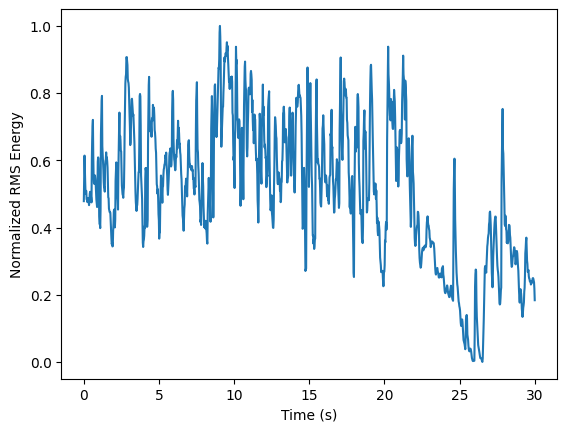

In [64]:
# Calcular energia RMS
rms = librosa.feature.rms(y=x)

# Normalizar
normalized_rms = normalize(rms[0])

# Exibir a energia RMS normalizada em função do tempo
plt.plot(librosa.frames_to_time(np.arange(len(normalized_rms))), normalized_rms)
plt.xlabel("Time (s)")
plt.ylabel("Normalized RMS Energy")
plt.show()

## Extracting features from Spectrogram

In [ ]:
emotions = 'angry anxious apologetic assertive concerned encouraging excited happy neutral sad'.split()

In [125]:
import pathlib,os
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
emotions = 'excited happy neutral sad'.split()
for g in emotions:
    pathlib.Path(f'./JLCorpus/img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./JLCorpus/dataset/emotions/{g}'):
        songname = f'./JLCorpus/dataset/emotions/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'./JLCorpus/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf() 

<Figure size 1000x1000 with 0 Axes>

In [126]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

# Writing data to csv

In [128]:
import csv
import numpy as np
file = open('JLCorpus/data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
emotions = 'angry anxious apologetic assertive concerned encouraging excited happy neutral sad'.split()
for g in emotions:
    for filename in os.listdir(f'./JLCorpus/dataset/emotions/{g}'):
        songname = f'./JLCorpus/dataset/emotions/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('JLCorpus/data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [129]:
!zip -r "/content/drive/My Drive/01_Projetos/Bertoleza/Code/JLCorpusData.zip" "JLCorpus"

Streaming output truncated to the last 5000 lines.
  adding: JLCorpus/text/male1_encouraging_9a_1.txt (stored 0%)
  adding: JLCorpus/text/female1_assertive_12a_1.txt (stored 0%)
  adding: JLCorpus/text/male2_assertive_8b_2.txt (stored 0%)
  adding: JLCorpus/text/male1_neutral_12b_2.txt (stored 0%)
  adding: JLCorpus/text/female1_excited_5b_2.txt (stored 0%)
  adding: JLCorpus/text/male1_assertive_9b_2.txt (stored 0%)
  adding: JLCorpus/text/male1_apologetic_2a_1.txt (stored 0%)
  adding: JLCorpus/text/male2_encouraging_12b_1.txt (stored 0%)
  adding: JLCorpus/text/female2_happy_6b_2.txt (stored 0%)
  adding: JLCorpus/text/male2_happy_3a_2.txt (deflated 4%)
  adding: JLCorpus/text/female1_apologetic_13b_2.txt (stored 0%)
  adding: JLCorpus/text/male1_angry_11b_1.txt (stored 0%)
  adding: JLCorpus/text/male1_encouraging_8b_1.txt (stored 0%)
  adding: JLCorpus/text/female2_sad_14b_2.txt (stored 0%)
  adding: JLCorpus/text/male1_apologetic_4b_1.txt (stored 0%)
  adding: JLCorpus/text/male1